# K-Meansによるクラスタリングを実装してみる

make_blobsで人工的にデータを生成して、K-Meansを用いてクラスタリングしてみる。


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_blobs


# データの生成

サンプル数 : 300
クラスタ数 : 4

In [2]:
n_samples = 300
n_centers = 4

X, true_labels = make_blobs(
    n_samples = n_samples,
    centers = n_centers,
    cluster_std = 0.98,
    random_state=42
)


In [3]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['True Label'] = true_labels

In [4]:
df.head(10)

,Feature1,Feature2,True Label
0,-9.288501,6.490675,3
1,-9.681533,6.946658,3
2,-1.703104,7.817859,0
3,-7.092955,-5.803308,2
4,-10.835690,6.335598,3
5,-6.039121,-7.036849,2
6,4.809596,2.350781,1
7,-6.474954,-7.432560,2
8,-2.978788,8.832340,0
9,3.472401,2.616592,1


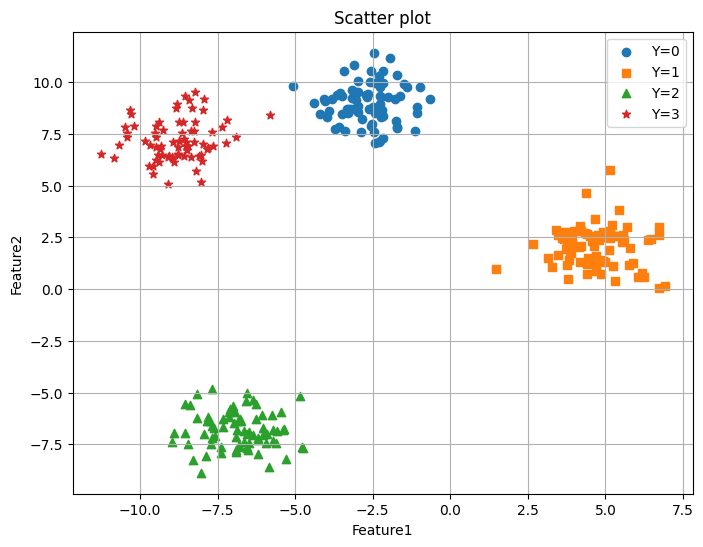

In [5]:
markers = {0: 'o', 1:'s', 2: '^', 3:'*'}

plt.figure(figsize=(8,6))

for label in np.unique(true_labels):
    mask  = true_labels == label
    plt.scatter(X[mask, 0], X[mask, 1], marker=markers[label], label=f'Y={label}')

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter plot')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
def init_centroid(X, k, n_data):
    idx = np.random.permutation(n_data)[:k]
    centroid = X[idx]
    return centroid

def compute_distances(X, k, n_data, centroids):
    # ゼロで初期化
    distances = np.zeros((n_data, k))

    # Xとcentroidとの距離を計算
    for idx_centroids in range(k):
        dist = np.sqrt(np.sum((X - centroids[idx_centroids])**2, axis=1))
        distances[:, idx_centroids] = dist
    return distances

def k_means(X, k, max_iter=300):
    """
    X.shape = (データ数, 次元数)
    k = クラスタ数
    """
    n_data, n_features = X.shape
    centroids = init_centroid(X, k, n_data)

    new_cluster = np.zeros(n_data)

    for epoch in range(max_iter):
        # 各中心からの距離を計算
        distances = compute_distances(X, k, n_data, centroids)

        # 距離が一番近いものをクラスタとして分類
        # distancesのインデックスをクラスタの番号として扱う
        new_cluster= np.argmin(distances, axis=1)

        cluster = np.zeros(n_data)
        
        # 各中心位置を更新
        for idx_centroids in range(k):
            # Xをnew_cluster == idx_centroids でフィルタしてから、平均を求める
            centroids[idx_centroids] = X[new_cluster == idx_centroids].mean(axis=0) 

        if (new_cluster == cluster).all():
            break

        cluster = new_cluster

    return cluster
    
    

In [7]:
cluster = k_means(X, n_centers)

In [8]:
cluster

array([2, 2, 0, 1, 2, 1, 3, 1, 0, 3, 0, 3, 0, 0, 2, 0, 2, 3, 0, 0, 3, 0,
       1, 2, 0, 2, 2, 1, 1, 3, 0, 3, 2, 3, 2, 0, 2, 1, 2, 1, 3, 0, 2, 1,
       0, 0, 2, 3, 2, 3, 1, 2, 1, 0, 1, 3, 2, 3, 3, 0, 2, 3, 3, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 3, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 3,
       3, 3, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 3, 3, 3, 0, 0, 0, 0, 0, 1, 2,
       3, 0, 0, 0, 0, 3, 2, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 3, 0,
       0, 0, 0, 3, 3, 2, 0, 1, 0, 3, 1, 0, 3, 3, 3, 3, 1, 0, 0, 2, 3, 1,
       0, 3, 1, 2, 2, 3, 0, 2, 1, 2, 3, 2, 1, 0, 0, 0, 0, 0, 1, 3, 3, 1,
       1, 3, 3, 1, 2, 0, 2, 3, 3, 2, 1, 0, 3, 3, 1, 1, 1, 2, 3, 1, 1, 3,
       3, 2, 0, 0, 1, 3, 0, 1, 1, 2, 1, 0, 0, 1, 1, 3, 2, 1, 2, 2, 0, 2,
       2, 1, 2, 1, 3, 3, 2, 2, 3, 3, 3, 2, 0, 1, 3, 1, 2, 3, 2, 2, 2, 1,
       1, 3, 2, 1, 1, 1, 2, 1, 2, 1, 2, 3, 1, 2, 3, 0, 2, 0, 3, 0, 2, 0,
       1, 3, 1, 3, 3, 0, 0, 1, 3, 3, 2, 2, 1, 0, 0, 3, 3, 3, 3, 1, 2, 3,
       1, 3, 3, 1, 0, 1, 3, 0, 2, 0, 3, 0, 2, 2])

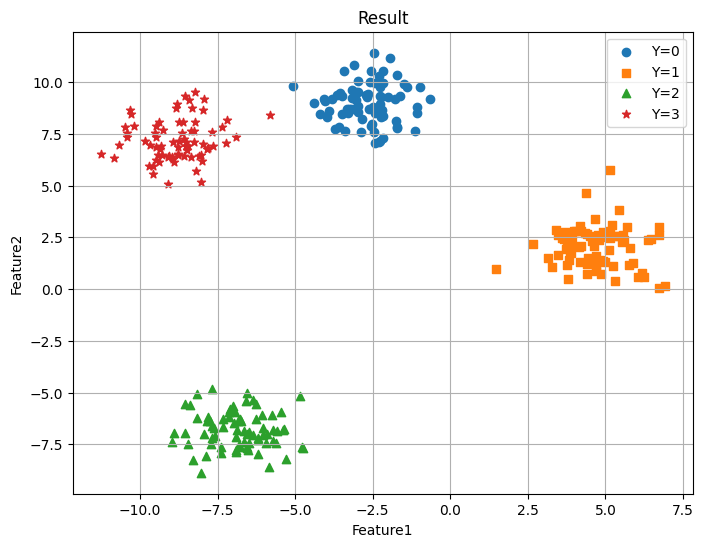

In [10]:
markers = {0: 'o', 1:'s', 2: '^', 3:'*'}

plt.figure(figsize=(8,6))

for label in np.unique(cluster):
    mask  = true_labels == label
    plt.scatter(X[mask, 0], X[mask, 1], marker=markers[label], label=f'Y={label}')

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Result')
plt.legend()
plt.grid(True)
plt.show()